### Analise da Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import mean, absolute

In [37]:
df = pd.read_csv('/content/dados.csv')

In [38]:
df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Definindo os intevalos das classes em reais (R$)

In [39]:
classes = [0, 1576, 3940, 11820, 19700, 20000]

In [40]:
min(df['Renda']), max(df['Renda'])

(0, 200000)

### Definindo os labels das classes

In [41]:
labels = ['E', 'D', 'C', 'B', 'A']

### Construindo a coluna de frequências

In [42]:
frequencia = pd.value_counts(pd.cut(x = df['Renda'], 
                                    bins = classes, 
                                    labels = labels, 
                                    include_lowest=True))
frequencia

E    49755
D    18602
C     7241
B      822
A      161
Name: Renda, dtype: int64

### Construindo a coluna de percentuais

In [43]:
percentil = pd.value_counts(pd.cut(x = df['Renda'], 
                                   bins = classes, 
                                   labels = labels, 
                                   include_lowest=True), 
                            normalize=True) * 100
percentil

E    64.970423
D    24.290620
C     9.455348
B     1.073373
A     0.210235
Name: Renda, dtype: float64

### Juntando as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [44]:
classes_salariais = pd.DataFrame({"Frequência": frequencia, "Percentil": percentil})

In [45]:
classes_salariais['Classes'] = classes_salariais.index

In [46]:
classes_salariais.reset_index(drop=True, inplace=True)

In [47]:
classes_salariais.sort_values(by='Classes', inplace=True, ascending=False)

In [48]:
classes_salariais.columns

Index(['Frequência', 'Percentil', 'Classes'], dtype='object')

In [49]:
ordenar_colunas = ['Classes', 'Frequência', 'Percentil']

In [50]:
classes_salariais = classes_salariais[ordenar_colunas]

In [51]:
classes_salariais

,Classes,Frequência,Percentil
4,A,161,0.210235
3,B,822,1.073373
2,C,7241,9.455348
1,D,18602,24.290620
0,E,49755,64.970423


### Construindo um gráfico de barras para visualizar as informações da tabela de frequências acima

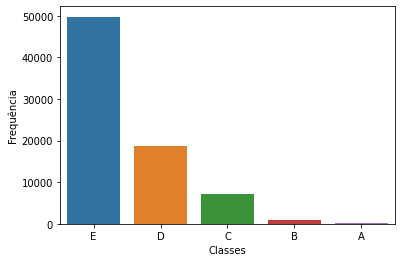

In [52]:
sns.barplot(x = classes_salariais['Classes'], y = classes_salariais['Frequência']);

### Conclusões

Maior parte dos individuos, relacionados nesta base de dados, são da classe E (recebem até 2 salários minimos)

### Histograma para as variáveis QUANTITATIVAS de nosso dataset

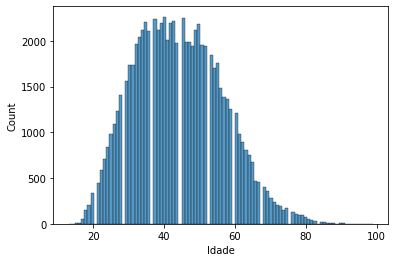

In [53]:
sns.histplot(x = df['Idade']);

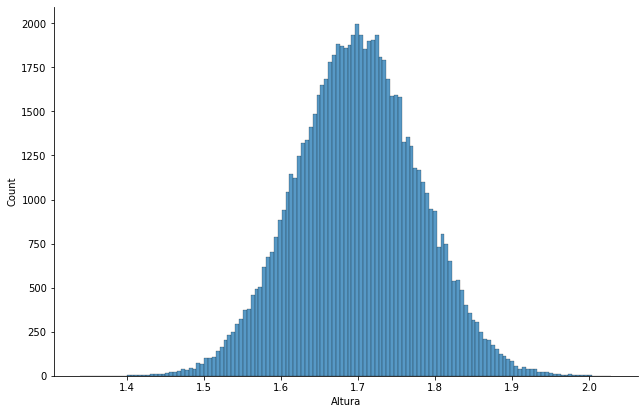

In [54]:
ax = sns.displot(x = df['Altura'])
ax.figure.set_size_inches(10, 6)
ax

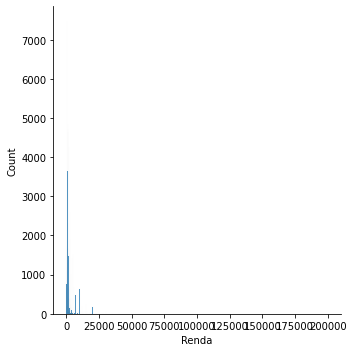

In [55]:
sns.displot(data = df, x = 'Renda');

> ### Conclusões

Variaveis Idade e Renda estão assimétrica a direita; Variavel Altura esta assimétrica centralizada.


### Constrindo uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR

In [56]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [57]:
frequencia = pd.crosstab(df['Sexo'], df['Cor'])

frequencia.rename(index = sexo, inplace=True)
frequencia.rename(columns= cor, inplace=True)

frequencia

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


In [58]:
percentil = pd.crosstab(df['Sexo'], df['Cor'], normalize=True) * 100

percentil.rename(index = sexo, inplace=True)
percentil.rename(columns= cor, inplace=True)

percentil

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867


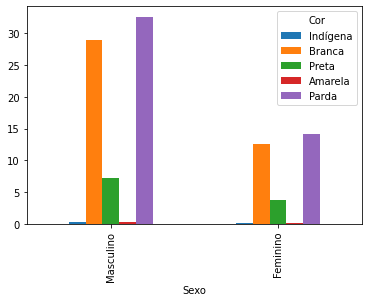

In [59]:
percentil.plot(kind='bar');

> ### Conclusões

Nesta base de dados há mais pessoas do sexo Masculino e a grande maioria são da cor Parda e Branca

## Análise de medidas descritiva da variavel Renda

In [60]:
#médica aritimética
df['Renda'].mean()

2000.3831988547631

In [61]:
#mediana
df['Renda'].median()

1200.0

In [62]:
#moda
df['Renda'].mode()[0]

788

In [63]:
#desvio médio absoluto
df['Renda'].mad()

1526.4951371638058

In [64]:
#variância
df['Renda'].var()

11044906.006217021

In [65]:
#desvio padrão
df['Renda'].std()

3323.3877303464037

### Obtendo a média, mediana e valor máximo da variável RENDA segundo SEXO e COR

In [66]:
frequencia = pd.crosstab(df['Cor'], df['Sexo'], values = df['Renda'], aggfunc={np.mean, np.median, np.max})

frequencia.rename(index = cor, inplace=True)
frequencia.rename(columns = sexo, inplace=True)

frequencia

amax                   mean                 median         
Sexo     Masculino  Feminino    Masculino     Feminino Masculino Feminino
Cor                                                                      
Indígena   10000.0  120000.0  1081.710938  2464.386139     797.5    788.0
Branca    200000.0  100000.0  2925.744435  2109.866750    1700.0   1200.0
Preta      50000.0   23000.0  1603.861687  1134.596400    1200.0    800.0
Amarela    50000.0   20000.0  4758.251064  3027.341880    2800.0   1500.0
Parda     100000.0   30000.0  1659.577425  1176.758516    1200.0    800.0

> ### Conclusões

Em todas as medidas pessoas na cor amarela do sexo Masculino tem maior valor.

### Obtendo as medidas de dispersão da variável RENDA segundo SEXO e COR

In [67]:
#frequencia_absolute = pd.crosstab(df['Cor'], df['Sexo'], values = absolute(df['Renda']), aggfunc={np.mean})
frequencia = pd.crosstab(df['Cor'], df['Sexo'], values = df['Renda'], aggfunc={'mean', 'mad', 'std'})

frequencia.rename(index = cor, inplace=True)
frequencia.rename(columns= sexo, inplace=True)

frequencia

mad                      mean                       std  \
Sexo        Masculino     Feminino    Masculino     Feminino    Masculino   
Cor                                                                         
Indígena   798.910889  3007.892952  1081.710938  2464.386139  1204.093490   
Branca    2261.012346  1670.967106  2925.744435  2109.866750  4750.791872   
Preta      975.602482   705.453357  1603.861687  1134.596400  1936.309271   
Amarela   3709.597211  2549.146322  4758.251064  3027.341880  5740.824820   
Parda     1125.827704   811.580946  1659.577425  1176.758516  2312.087184   

                        
Sexo          Feminino  
Cor                     
Indígena  11957.498292  
Branca     3251.013154  
Preta      1349.799809  
Amarela    3731.173660  
Parda      1596.233048

### Box plot da variável RENDA segundo SEXO e COR

In [68]:
ds_cor = []

for i in df['Cor']:
  for y in cor:
    if i == y:
      ds_cor.append(cor[y])

df['ds_cor'] = ds_cor

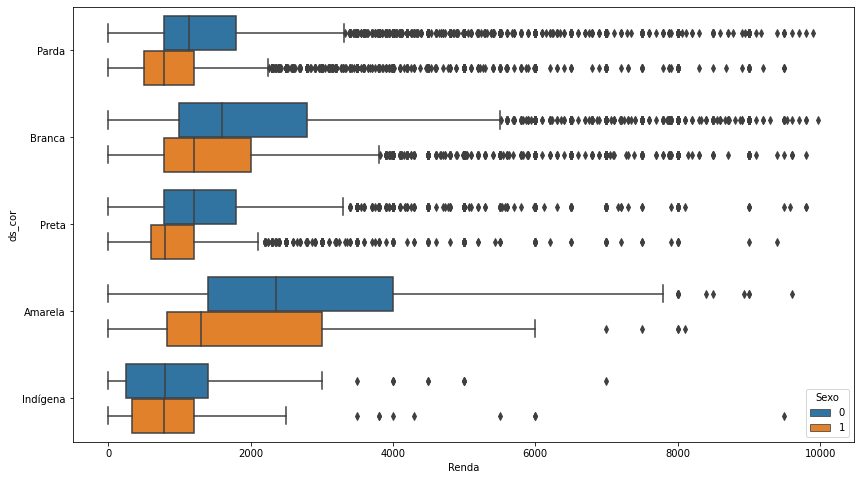

In [69]:
ax = sns.boxplot(data=df.query('Renda < 10000'), y='ds_cor', x='Renda', hue='Sexo')
ax.figure.set_size_inches(14,8)

> ### Conclusões

A média das pessoas da cor amarela, ambos os sexos, é maior que a média das pessoas das demais cores. E a grande número de outliers em pessoas das core parda e preta.

### Verificando quais pessoas de nosso ganham um salário mínimo (R$ 788,00) ou menos.

In [70]:
from scipy import stats

In [71]:
percentual = stats.percentileofscore(df['Renda'], 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Verificando qual o valor máximo ganho por 60% das pessoas do dataset.

In [72]:
valor = df['Renda'].quantile(.6)
print("R$ {0:.2f}".format(valor))

R$ 1500.00


### Obtendo a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

In [73]:
df['Anos de Estudo'].unique()

array([12, 15,  6,  9, 14, 16, 10,  1,  5,  7,  3,  2,  4,  8, 11, 17, 13])

In [74]:
[i for i in anos_de_estudo.values()]

['Sem instrução e menos de 1 ano',
 '1 ano',
 '2 anos',
 '3 anos',
 '4 anos',
 '5 anos',
 '6 anos',
 '7 anos',
 '8 anos',
 '9 anos',
 '10 anos',
 '11 anos',
 '12 anos',
 '13 anos',
 '14 anos',
 '15 anos ou mais',
 'Não determinados']

In [75]:
frequencia = pd.crosstab(df['Anos de Estudo'], df['Sexo'], values = df['Renda'], aggfunc={'mean', 'median', 'max', 'std'})

frequencia.rename(index = sexo, inplace=True)

frequencia

max                   mean               median          \
Sexo                   0         1            0            1       0       1   
Anos de Estudo                                                                 
Feminino         30000.0   10000.0   799.494638   516.201748   700.0   390.0   
2                30000.0    2000.0   895.629047   492.771987   788.0   400.0   
3                40000.0    4000.0   931.178986   529.911638   788.0   450.0   
4                80000.0    3500.0  1109.203862   546.853916   800.0   500.0   
5                50000.0   10000.0  1302.329283   704.279111  1000.0   788.0   
6                35000.0    8000.0  1338.653218   781.389776  1045.0   788.0   
7                25000.0    6000.0  1448.875419   833.732824  1200.0   788.0   
8                40000.0    9000.0  1465.497940   830.751004  1200.0   788.0   
9                30000.0   18000.0  1639.396667   933.615351  1300.0   800.0   
10               60000.0   20000.0  1508.038850   868.021700  1200.0   788.0   
11               45000.0    6000.0  1731.270847   925.919225  1218.0   800.0   
12              200000.0  100000.0  2117.060504  1286.790889  1500.0  1000.0   
13               30000.0  120000.0  2470.330776  1682.313725  1800.0  1200.0   
14               25000.0   20000.0  3195.099154  1911.730047  2400.0  1300.0   
15               50000.0   20000.0  3706.620269  2226.460457  2500.0  1600.0   
16              200000.0  100000.0  6134.279790  3899.513231  4000.0  2800.0   
17                7000.0    3000.0  1295.761905   798.174419  1200.0   788.0   

                        std               
Sexo                      0            1  
Anos de Estudo                            
Feminino        1023.904884   639.311534  
2               1331.950552   425.291842  
3               1435.173827   498.234168  
4               2143.800133   424.124446  
5               1419.821787   629.553397  
6               1484.650587   635.782641  
7               1476.628602   574.547028  
8               1419.708673   602.038029  
9               1515.583715   896.781213  
10              2137.664774   973.221652  
11              2078.609734   620.611907  
12              2676.538942  1819.040417  
13              2268.081538  4851.833513  
14              2797.116800  2053.789771  
15              3987.214974  2064.083336  
16              7447.613594  4212.770709  
17               979.648745   459.985964

### Box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### - Somente as informações de pessoas com renda abaixo de R$ 10.000.

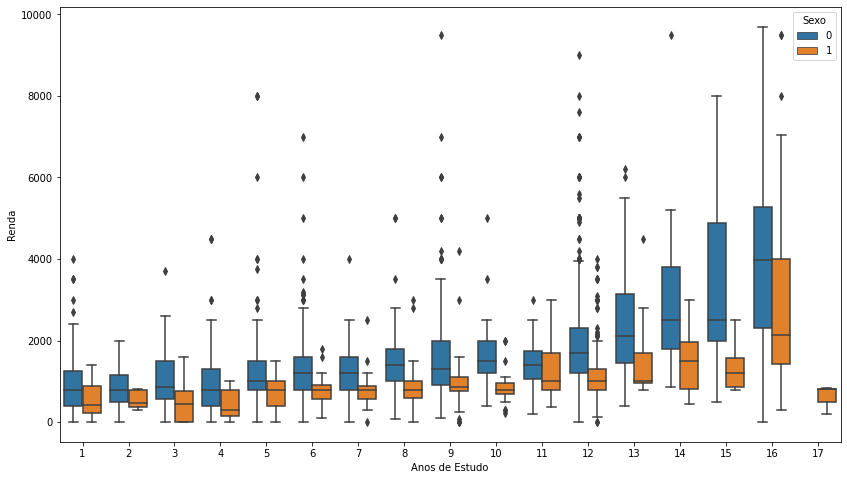

In [76]:
ax = sns.boxplot(data=df.query('Renda < 10000 and Idade == 40'), y='Renda', x='Anos de Estudo', hue='Sexo')
ax.figure.set_size_inches(14,8)

### Obtendo a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO.

In [77]:
ds_uf = []

for i in df['UF']:
  for y in uf:
    if i == y:
      ds_uf.append(uf[y])

df['ds_uf'] = ds_uf

In [78]:
df.groupby('ds_uf').agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
                            mean  median     max          std
ds_uf                                                        
Acre                 1506.091782   900.0   30000  2276.233415
Alagoas              1144.552602   788.0   11000  1237.856197
Amapá                1861.353516  1200.0   15580  2020.688632
Amazonas             1445.130100   900.0   22000  1757.935591
Bahia                1429.645094   800.0  200000  3507.917248
Ceará                1255.403692   789.0   25000  1821.963536
Distrito Federal     4241.954722  2000.0  100000  5550.463338
Espírito Santo       2026.383852  1274.0  100000  3513.846868
Goiás                1994.580794  1500.0   30000  2221.933065
Maranhão             1019.432009   700.0   30000  1887.816905
Mato Grosso          2130.652778  1500.0   35000  2542.630178
Mato Grosso do Sul   2262.604167  1500.0   42000  3031.419122
Minas Gerais         2056.432084  1200.0  100000  3584.721547
Paraná               2493.870753  1500.0  200000  4302.937995
Paraíba              1293.370487   788.0   30000  1950.272431
Pará                 1399.076871   850.0   50000  2053.779555
Pernambuco           1527.079319   900.0   50000  2389.622497
Piauí                1074.550784   750.0   40000  2373.355726
Rio Grande do Norte  1344.721480   800.0   15500  1651.805500
Rio Grande do Sul    2315.158336  1500.0   35000  2913.335783
Rio de Janeiro       2496.403168  1400.0  200000  5214.583518
Rondônia             1789.761223  1200.0   50000  2406.161161
Roraima              1783.588889  1000.0   20000  2079.659238
Santa Catarina       2470.854945  1800.0   80000  3137.651112
Sergipe              1109.111111   788.0   16000  1478.997878
São Paulo            2638.104986  1600.0   80000  3503.777366
Tocantins            1771.094946  1000.0   60000  2934.590741

### Box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO

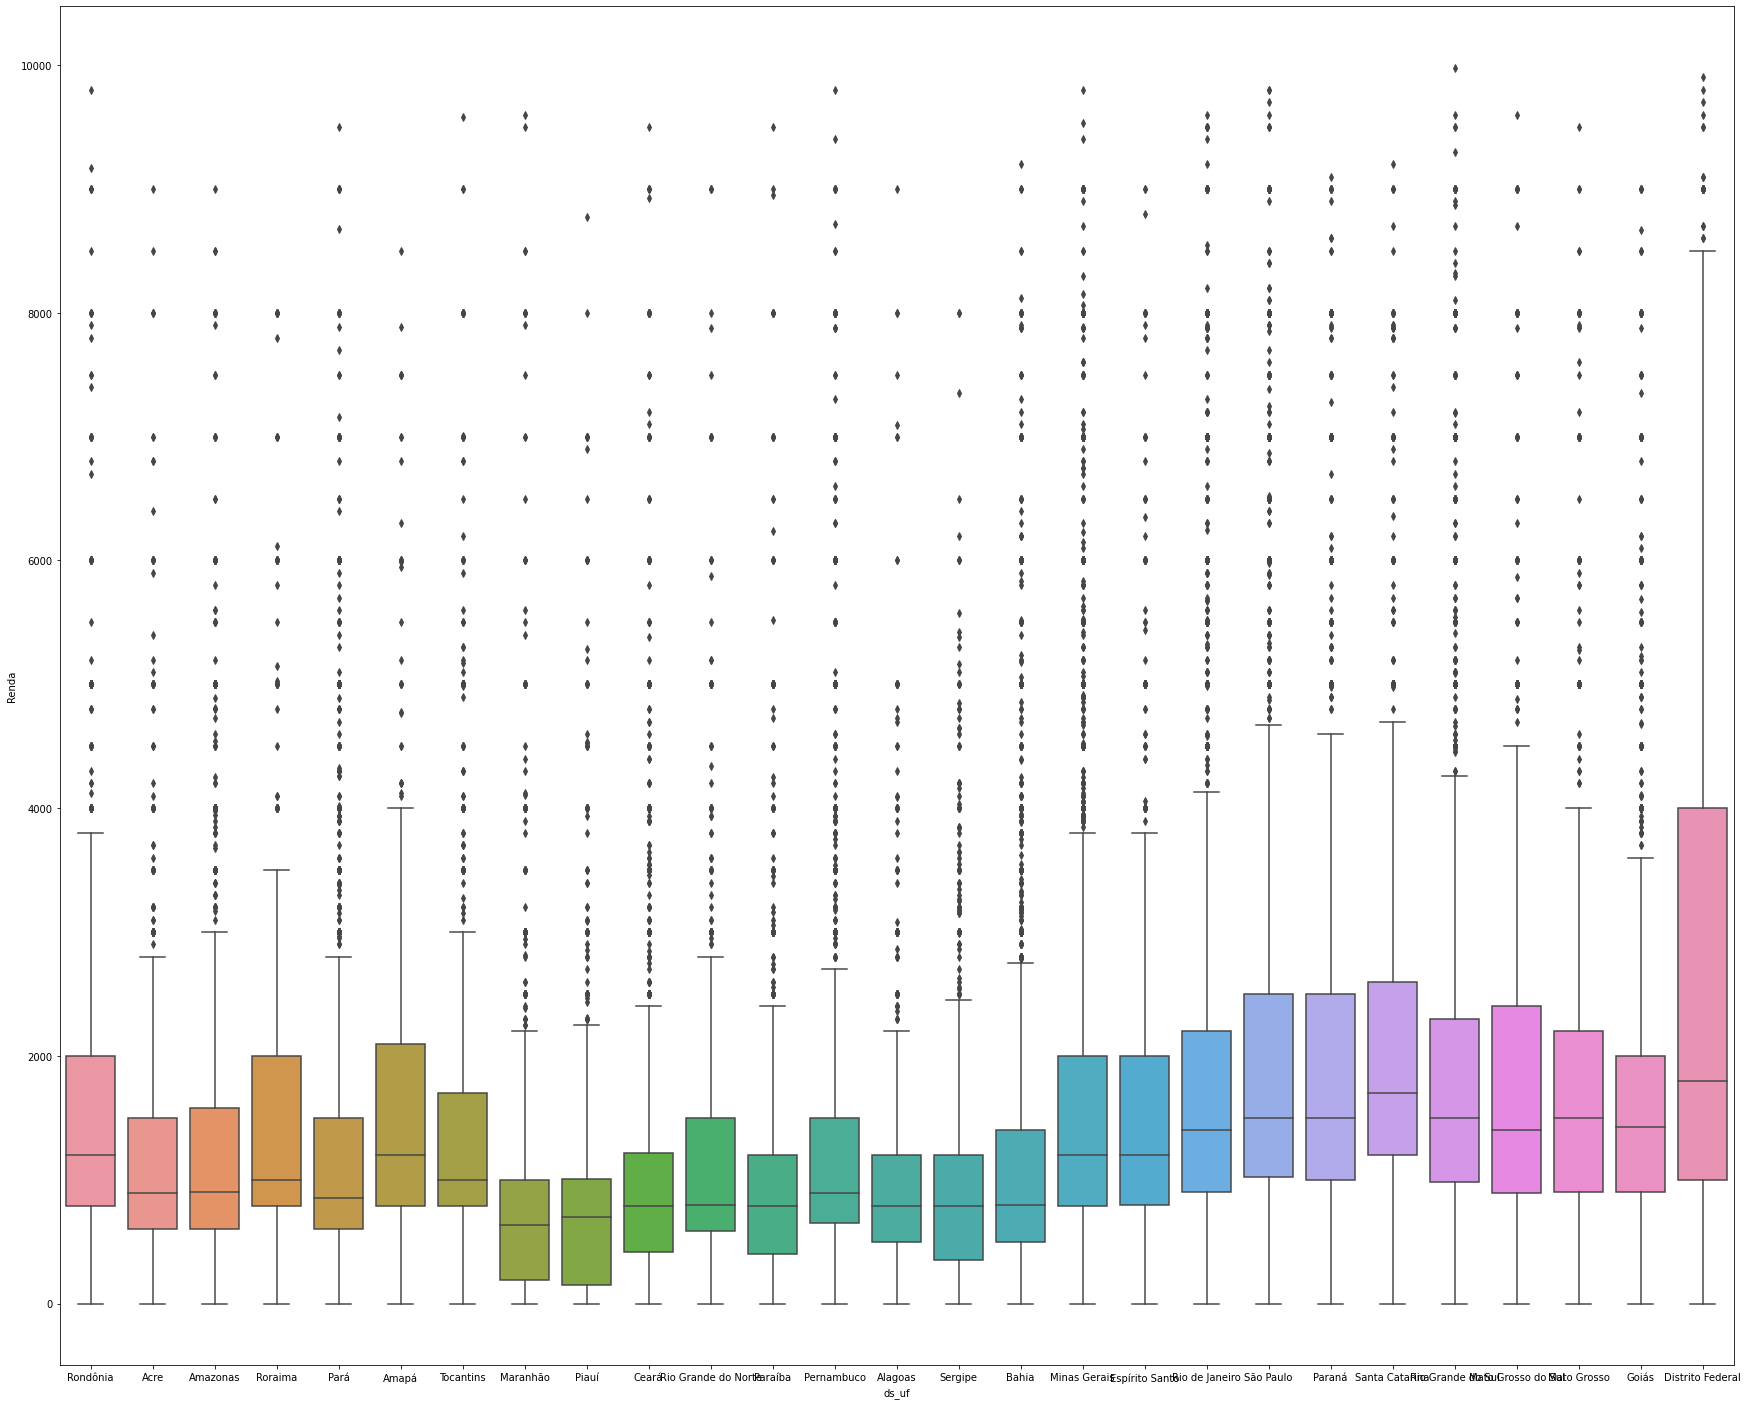

In [80]:
plt.subplots(figsize=(30, 25))
sns.boxplot(data=df.query('Renda < 10000'), y='Renda', x='ds_uf')

> ### Conclusões

Distrito Federal tem a maior média